In [8]:
## Import useful libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [19]:
## Read in Data

blueDF = pd.read_csv('BlueBloodTiming.csv')
blueDF = blueDF.replace(np.nan, 0, regex=True)

blueDF.head()

,Team,Week,Day,Month,Date,Year,Court,Opponent,Rank,Rank2,WL,Score,OppScore
0,Kentucky,1,Tue,Nov,6,2018,N,Duke,4.0,0.0,L,84,118
1,Kentucky,2,Fri,Nov,9,2018,0,Southern Illinois,0.0,0.0,W,71,59
2,Kentucky,3,Wed,Nov,14,2018,0,North Dakota,0.0,0.0,W,96,58
3,Kentucky,4,Sun,Nov,18,2018,0,Virginia Military Institute,0.0,0.0,W,92,82
4,Kentucky,5,Wed,Nov,21,2018,0,Winthrop,0.0,0.0,W,87,74


In [45]:
## Fix the ranking (0.0 means unranked)

blueDF['temp'] = blueDF['Rank'] + blueDF['Rank2']
blueDF['RANK'] = np.where(blueDF['temp'] > 0, blueDF['temp'], 0)
blueDF.head()

,Team,Week,Day,Month,Date,Year,Court,Opponent,Rank,Rank2,WL,Score,OppScore,temp,RANK
0,Kentucky,1,Tue,Nov,6,2018,N,Duke,4.0,0.0,L,84,118,4.0,4.0
1,Kentucky,2,Fri,Nov,9,2018,0,Southern Illinois,0.0,0.0,W,71,59,0.0,0.0
2,Kentucky,3,Wed,Nov,14,2018,0,North Dakota,0.0,0.0,W,96,58,0.0,0.0
3,Kentucky,4,Sun,Nov,18,2018,0,Virginia Military Institute,0.0,0.0,W,92,82,0.0,0.0
4,Kentucky,5,Wed,Nov,21,2018,0,Winthrop,0.0,0.0,W,87,74,0.0,0.0


In [63]:
## Get all the losses to unranked team

losses = blueDF[(blueDF['RANK'] < 1) & (blueDF['WL'] == 'L')]
losses.head()

,Team,Week,Day,Month,Date,Year,Court,Opponent,Rank,Rank2,WL,Score,OppScore,temp,RANK
8,Kentucky,9,Sat,Dec,8,2018,N,Seton Hall,0.0,0.0,L,83,84,0.0,0.0
12,Kentucky,13,Sat,Jan,5,2019,@,Alabama,0.0,0.0,L,75,77,0.0,0.0
41,Kentucky,11,Sat,Dec,23,2017,N,UCLA,0.0,0.0,L,75,83,0.0,0.0
48,Kentucky,18,Tue,Jan,16,2018,@,South Carolina,0.0,0.0,L,68,76,0.0,0.0
49,Kentucky,19,Sat,Jan,20,2018,0,Florida,0.0,0.0,L,64,66,0.0,0.0


Text(0.5,0,'Game Number')

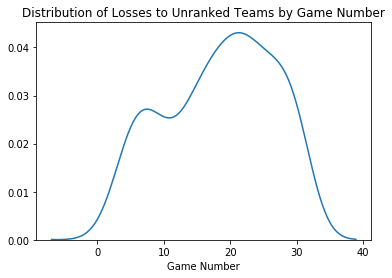

In [149]:
## Number of losses by game number to unranked teams

ax = sns.distplot(losses['Week'], hist=False);
ax.set_title('Distribution of Losses to Unranked Teams by Game Number')
ax.set_xlabel('Game Number')

In [128]:
## Get the win percentage by game number

wins = [0] * 50
games = [0] * 50

for index, row in blueDF.iterrows():
    week = int(row['Week'])
    win = (row['WL'] == 'W')
    ind = week
    
    games[ind] += 1
    
    if win == True: 
        wins[ind] += 1

def getWeekWinPct(week):
    totalWins = wins[week]
    totalGames = games[week]
    
    return round(totalWins / totalGames, 2)

Text(0.5,0,'Game Number')

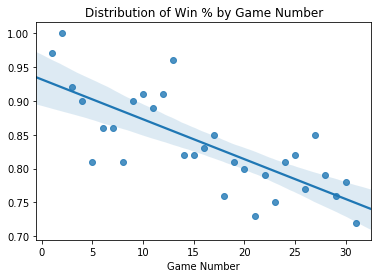

In [155]:
## Plot win % by game number

weekWinPcts = []
week = []
for i in range(1, 32):
    if games[i] != 0:
        weekWinPcts.append(getWeekWinPct(i))
    else:
        weekWinPcts.append(0)
    
    week.append(i)
    
ax = sns.regplot(x=week, y=weekWinPcts);
ax.set_title('Distribution of Win % by Game Number')
ax.set_xlabel('Game Number')

Text(0.5,0,'Game Number')

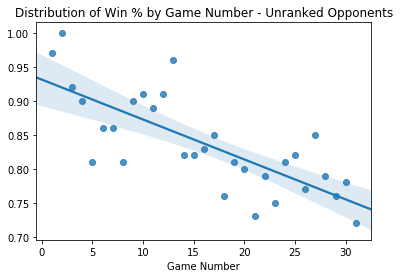

In [154]:
## Plot win % by game number specifically against unranked teams

wins = [0] * 50
games = [0] * 50

for index, row in blueDF.iterrows():
    week = int(row['Week'])
    win = (row['WL'] == 'W')
    ind = week
    unranked = (row['RANK'] == 0.0)
    
    if unranked: 
        games[ind] += 1
    
    if win & unranked: 
        wins[ind] += 1

def getWeekWinPct(week):
    totalWins = wins[week]
    totalGames = games[week]
    
    return round(totalWins / totalGames, 2)

weekWinPcts = []
week = []
for i in range(1, 32):
    if games[i] != 0:
        weekWinPcts.append(getWeekWinPct(i))
    else:
        weekWinPcts.append(0)
    
    week.append(i)
    
ax = sns.regplot(x=week, y=weekWinPcts);
ax.set_title('Distribution of Win % by Game Number - Unranked Opponents')
ax.set_xlabel('Game Number')

In [147]:
## Find the difference in winning percentage against unranked teams early in season vs late in season

numGamesEarly = blueDF[(blueDF['Week'] <= 5) & blueDF['RANK'] == 0.0]
restOfGames = blueDF[(blueDF['Week'] > 5) & (blueDF['Week'] < 25) & (blueDF['RANK'] == 0.0)]

earlyLosses = numGamesEarly[(numGamesEarly['WL'] == 'L')]
otherLosses = restOfGames[(restOfGames['WL'] == 'L')]

earlyLosePct = round(len(earlyLosses) / len(numGamesEarly) * 100, 2)
print('Loss % in first 5 games: ', earlyLosePct, '%')

otherLosePct = round(len(otherLosses) / len(restOfGames) * 100, 2)
print('Loss % in rest of games: ', otherLosePct, '%')

Loss % in first 5 games:  22.1 %
Loss % in rest of games:  16.14 %


In [162]:
## Showing statistic significant of winning percentage difference using t-test

t1 = []
for each in restOfGames['WL']:
    if each == "W":
        t1.append(1)
    else:
        t1.append(0)

t2 = []
for EACH in numGamesEarly['WL']:
    if EACH == "W":
        t2.append(1)
    else:
        t2.append(0)
        
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

t, p = ttest_ind(t1, t2, equal_var=False)
round(p, 10)

5.734e-07